<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [8]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Aim

## Classifying mood through music

The choice of music a person listen to can be a good predictor of a person's mood. If you are elated you will listen to exciting, happy music. If you have a heartbreak you will be listening to sad music. If a person is  rebelling agaist the world and is angry mostly heor she will most likely prefer to  listen to angry music. Music can easily predict the mental emotional state of the listner or could also bring out those emotions.
<br>
Humans are very good in associating a mood with the music, they can naturally relate an emotion to the music. Identifying emotions or mood attached to the music is a big task for scientist which will be very usefull in building fututre soical conversational agents which can behave more in a human like fashion

# Machine Learning

Machine Learning is the study of computer algorithms that improve automatically
through experience. Tom Mitchell[1]

Machine learning (ML) is the study of algorithms and mathematical models that
computer systems use to progressively improve their performance on a specific task.
Machine learning algorithms build a mathematical model of sample data, known as
"training data", in order to make predictions or decisions without being explicitly
programmed to perform the task[2][3].

## Supervised Learning

Given a sample dataset comprising inputs and target outputs (labelled), chose a parameterized data model to approximate the respective input-output function by optimizing the parameters (learning).  In Supervised learning we are given a labelled input output pair, it learns  a function that maps an input to an output based on given labelled output. Or we can say Supervised machine learning learns a regularity $f : x\longrightarrow y$ resp. a
model for the unknown probability distribution
$p(y|x)$
from given input/output pairs $(x_{i},y{i})$.

Supervised learning can be used for regression  to predict a value (output is continous) like house pricing or temprature in weather prediction, or for classification (output is discrete classes). Classification algorithms can be used for image classification like detecting face, handwriting, or classifying diseases or spam filtering and may more. There are many supervised learning algorithms like linear regression, logistic regression, naive Bayes, support vector machine (SVM).We will focus on logistic regression and SVM and have a comparitive analysis.





# Logistic Regression
Though named as regression, logistic regression is a classification algorithm which is used to classify a binary classification problem[59][60]. 

## Logistic Function (Sigmoid Function)
<br>
$$g(z)=\frac{1}{1+e^{-z}}$$
<br>
<br>
- Maps $\mathbb{R}$ into interval $[0;1]$   
- $g(z)=0$ when $x\longrightarrow -\infty$
- $g(z)=1$ when $x\longrightarrow \infty$	

In [6]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import Title
from bokeh.plotting import figure
output_notebook()

def sigmoid(x, derivative=False):
    sigm = 1. / (1. + np.exp(-x))
    if derivative:
        return sigm * (1. - sigm)
    return sigm

x = np.linspace(-8, 8, 100)
y = sigmoid(x)

p = figure(title="Sigmoid Function", plot_height=300, plot_width=500, y_range=(-0.1,1.1)
           ,toolbar_location="above")
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)
p.add_layout(Title(text="X = X + W", align="center"), "below")


def update(f, w=0):
    if   f == "sigmoid": func = sigmoid
    r.data_source.data['y'] = func(w+x)
    push_notebook()
    
    
show(p, notebook_handle=True)
interact(update, f=["sigmoid"], w=(-8, 8))

Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('sigmoid',), value='sigmoid'), IntSlider(value=0, des…

<function __main__.update(f, w=0)>



## Hypothesis

\begin{align*}
\begin{split}
\\
h_\theta(x)=&g(\theta^{T}x)\\\\
=&\frac{1}{1+e^{-\theta^T x}}
\end{split}
\end{align*}

<br>
## Probability Representation
\begin{align*} 	
\\
h_\theta(x)=p(y=1|x,\theta)
\end{align*}

<br>
## Cost Function
\begin{align*}
\\
J(\theta)=-\frac{1}{m}\biggr(\sum_{i=1}^{m}y^{(i)}log(h_\theta (x^{(i)}))+(1-y^{(i)})log(1-h_\theta (x^{(i)}))	\biggr)
\end{align*}

<br>
<br>
The goal of the algorithm is to find parameter arguments $\theta'$ that minimize the cost function $J(\theta)$
<br>
The output predictions new input $x$ is given by :

\begin{align*}
\begin{split}
h_{\theta'}(x)=&\frac{1}{1+e^{-\theta^T x}}\\
=&p(y=1|x,\theta')
\end{split}
\end{align*}

<br>
## Optimization

As mathematically solving and optimizing the given cost function is really complex and really costly, there are many implementation of advanced optimization algorithm such as [conjugate gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method), [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm) and [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) are already available which are really fast and cost effective.

# Support Vector Machine (SVM)

SVM is one of the most commonly used supervised learning approach for classification (usually between 2 classes).

Typically, if a data set is linearly separable, there are infinitely many separating hyperplanes. A natural question to ask is: 

What is the best separating hyperplane? - The one that maximizes the distance to the closest data points from both classes. We say it is the hyperplane with maximum margin.
<br>
The SVM finds the maximum margin separating hyperplane

We define a linear classifier: $h(\mathbf{x})=\textrm{sign}(\mathbf{w}^{T}\mathbf{x}+b)$ and we assume a binary classification setting with labels $\{+1,-1\}$.
![title](svm-margin1.png)
<center>Fig: SVM finds a hyperplane which has the maximum margin separating the classes</center>




## Margin
<br>
A hyperplane is defined through $\mathbf{w},b$ as a set of points such that $\mathcal{H}=\left\{\mathbf{x}\vert{}\mathbf{w}^T\mathbf{x}+b=0\right\}$. Let the margin $\gamma$ be defined as the distance from the hyperplane to the closest points across both classes
<br>
What is the distance of a point $\mathbf{x}$ to the hyperplane $\mathcal{H}$?
<br>
Consider some point $\mathbf{x}$. Let $\mathbf{d}$ be the vector from $\mathcal{H}$ to $\mathbf{x}$ of minimum length. Let $\mathbf{x}^P$ be the projection of $\mathbf{x}$ onto $\mathcal{H}$. It follows then that: 
<br>$\mathbf{x}^P=\mathbf{x}-\mathbf{d}$. 
<br>$\mathbf{d}$ is parallel to $\mathbf{w}$, so $\mathbf{d}=\alpha\mathbf{w}$ for some $\alpha\in\mathbb{R}$. 
<br>$\mathbf{x}^P\in\mathcal{H}$ which implies $\mathbf{w}^T\mathbf{x}^P+b=0$ 
<br>therefore $\mathbf{w}^T\mathbf{x}^P+b=\mathbf{w}^T(\mathbf{x}-\mathbf{d})+b=\mathbf{w}^T(\mathbf{x}-\alpha\mathbf{w})+b=0$ 
        <br>which implies $\alpha=\frac{\mathbf{w}^T\mathbf{x}+b}{\mathbf{w}^T\mathbf{w}}$ 
<br>The length of $\mathbf{d}$: 
        $$\left \| \mathbf{d} \right \|_2=\sqrt{\mathbf{d}^T\mathbf{d}}=\sqrt{\alpha^2\mathbf{w}^T\mathbf{w}}=\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\sqrt{\mathbf{w}^T\mathbf{w}}}=\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\left \| \mathbf{w} \right \|_{2}}$$
<br>Margin of $\mathcal{H}$ with respect to $D$: $\gamma(\mathbf{w},b)=\min_{\mathbf{x}\in D}\frac{\left | \mathbf{w}^T\mathbf{x}+b \right |}{\left \| \mathbf{w} \right \|_{2}}$ 
By definition, the margin and hyperplane are scale invariant: $\gamma(\beta\mathbf{w},\beta b)=\gamma(\mathbf{w},b), \forall \beta \neq 0$

Note that if the hyperplane is such that $\gamma$ is maximized, it must lie right in the middle of the two classes. In other words, $\gamma$ must be the distance to the closest point within both classes. (If not, you could move the hyperplane towards data points of the class that is further away and increase $\gamma$, which contradicts that $\gamma$ is maximized.)


## Max Margin Classifier
We can formulate our search for the maximum margin separating hyperplane as a constrained optimization problem. The objective is to maximize the margin under the constraints that all data points must lie on the correct side of the hyperplane: 
$$
\underbrace{\max_{\mathbf{w},b}\gamma(\mathbf{w},b)}_{maximize \ margin}  \textrm{such that} \ \  \underbrace{\forall i \ y_{i}(\mathbf{w}^Tx_{i}+b)\geq 0}_{separating \ hyperplane}
$$
If we plug in the definition of $\gamma$ we obtain:
$$ \underbrace{\max_{\mathbf{w},b}\underbrace{\frac{1}{\left \| \mathbf{w} \right \|}_{2}\min_{\mathbf{x}_{i}\in D}\left | \mathbf{w}^T\mathbf{x}_{i}+b \right |}_{\gamma(\mathbf{w},b)} \ }_{maximize \ margin} \ \  s.t. \ \  \underbrace{\forall i \ y_{i}(\mathbf{w}^Tx_{i}+b)\geq 0}_{separating \ hyperplane} $$


Because the hyperplane is scale invariant, we can fix the scale of $\mathbf{w},b$ anyway we want. Let's be clever about it, and choose it such that $$\min_{\mathbf{x}\in D}\left | \mathbf{w}^T\mathbf{x}+b \right |=1.$$ 
We can add this re-scaling as an equality constraint. 
Then our objective becomes: 
$$\max_{\mathbf{w},b}\frac{1}{\left \| \mathbf{w} \right \|_{2}}\cdot 1 = \min_{\mathbf{w},b}\left \| \mathbf{w} \right \|_{2} = \min_{\mathbf{w},b} \mathbf{w}^\top \mathbf{w}$$
(Where we made use of the fact $f(z)=z^2$ is a monotonically increasing function for $z\geq 0$ and $\|\mathbf{w}\|\geq 0$; i.e. the $\mathbf{w}$ that maximizes $\|\mathbf{w}\|_2$ also maximizes $\mathbf{w}^\top \mathbf{w}$.)</p>

The new optimization problem becomes: <br>
$$
\begin{align}
&\min_{\mathbf{w},b} \mathbf{w}^\top\mathbf{w} & \\
&\textrm{s.t. } 
\begin{matrix}
\forall i, \ y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b)&\geq 0\\ 
\min_{i}\left | \mathbf{w}^T \mathbf{x}_{i}+b \right | &= 1
\end{matrix}
\end{align}$$

<p>These constraints are still hard to deal with, however luckily we can show that (for the optimal solution) they are equivalent to a much simpler formulation.
$$
\begin{align}
&\min_{\mathbf{w},b}\mathbf{w}^T\mathbf{w}&\\ 
&\textrm{s.t.} \ \ \ \forall i \ y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b) \geq 1 &
\end{align}
$$ 

## Support Vectors

For the optimal $\mathbf{w},b$ pair, some training points will have tight constraints, i.e. $$y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b) = 1.$$ (This must be the case, because if for all training points we had a strict $>$ inequality, it would be possible to scale down both parameters $\mathbf{w},b$ until the constraints are tight and obtained an even lower objective value.) We refer to these training points as support vectors. Support vectors are special because they are the training points that define the maximum margin of the hyperplane to the data set and they therefore determine the shape of the hyperplane. If you were to move one of them and retrain the SVM, the resulting hyperplane would change.
![title](support-vector.png)


## Slack Variables

When the classes in the given data are not linearly separable  and we cannot solve the optimization problem for the given set of constraints, then one possible solution for optimization is to relax the constraints by introducing slack variables.

To allow for non-empty feasible region even in cases where the two classes are not separable by a hyperplane, we relax our constraints by adding slack variables as follows:
$$min∥w∥+C∥ξ∥$$
subject to: $$y_{i}(\mathbf{w}^T \mathbf{x}_{i}+b) \geq 1-ξ_{i} ; i=1…N.$$
where $ξ$ is a vector of $ξ_{i}$'s and C is simply tunable parameter.


## Data Set
### [AudioSet ](https://research.google.com/audioset///////index.html)(from Google)
A large-scale dataset of manually annotated audio events.
<br>It consists of an expanding ontology of 632 audio event classes and a collection of 2,084,320 human-labeled 10-second sound clips drawn from YouTube videos. The ontology is specified as a hierarchical graph of event categories, covering a wide range of human and animal sounds, musical instruments and genres, and common everyday environmental sounds.

#### Highlights
- 2.1 millions annotated videos
- 5800 hours of audio
- 527 classes of annotated sounds

## Dataset split
The dataset is divided in three disjoint sets: a balanced evaluation set, a balanced training set, and an unbalanced training set. In the balanced evaluation and training sets, we strived for each class to have the same number of examples. The unbalanced training set contains the remainder of annotated segments.

### Evaluation - [eval_segments.csv ](http://storage.googleapis.com/us_audioset/youtube_corpus/v1/csv/eval_segments.csv)
20,383 segments from distinct videos, providing at least 59 examples for each of the 527 sound classes that are used. Because of label co-occurrence, many classes have more examples.

### Balanced train - [balanced_train_segments.csv](http://storage.googleapis.com/us_audioset/youtube_corpus/v1/csv/balanced_train_segments.csv)
22,176 segments from distinct videos chosen with the same criteria: providing at least 59 examples per class with the fewest number of total segments.

### Unbalanced train - [unbalanced_train_segments.csv](http://storage.googleapis.com/us_audioset/youtube_corpus/v1/csv/unbalanced_train_segments.csv)
2,042,985 segments from distinct videos, representing the remainder of the dataset.

### Class labels
The labels are stored as integer indices. They are stored in  [class_labels_indices.csv.](http://storage.googleapis.com/us_audioset/youtube_corpus/v1/csv/class_labels_indices.csv)

## CSV file format
Each csv file has a three-line header with each line starting with “#”, and with the first two lines indicating the creation time and general statistics:

**\# Segments csv created Sun Mar  5 10:54:25 2017<br>
\# num_ytids=20371, num_segs=20371, num_unique_labels=527, num_positive_labels=51804**<br><br>
Each subsequent line has columns defined by the third header line:
<br><br>
**\# YTID, start_seconds, end_seconds, positive_labels**<br><br>
for example:<br><br>

**-0RWZT-miFs, 420.000, 430.000, "/m/03v3yw,/m/0k4j"**<br><br>
means that for the YouTube video -0RWZT-miFs, for the 10 second chunk from t=420 sec to t=430 sec, annotators confirmed the presence of sound classes /m/03v3yw ("Keys jangling") and /m/0k4j ("Car").


## Music Mood
Classes for music categories that indicate the over emotional affect of music, regardless of genre or instrumentation
<br>
- Happy Music
 - Music that evokes or conveys feelings of happiness. 1459 annotations in dataset
- Sad Music
 - Music that evokes or conveys feelings of sadness. 1770 annotations in dataset
- Exciting Music
 - Music that evokes or conveys feelings of excitement. 5638 annotations in dataset
- Scary Music
 - Music that evokes or conveys feelings of fear. 1737 annotations in dataset


# Data Pre Processing

## Challenges

The unbalanced_train_segments.csv contains more then 2 millions lines, the normal csv programs like MS-Excel, Open-Office or google sheets were unable to open the file. 
<br> loading the csv in python using pandas also gives a tokenization error.


In [1]:
import csv
import pandas as pd


df = pd.read_csv("Path_to_unbalanced_train_segments.csv",  sep=',') # give path where you have downloaded "unbalanced_train_segments.csv"
print(df.head(4))

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4, saw 8


If we remember the [format](#CSV-file-format) of the CSV file. The fisrt 2 lines contains creation time and general statistics and the "positive labels" column contains more than one string labels conatined by "qutaion" and seperated by ','.

So we must skip the first two row and make sure that the qutations remains.

In [2]:
import cv2
import csv
import pandas as pd


# By skipping first 2 rows and intial space and using python engine our error resolved.
# sep=',s+' make sure that the ""  remains intact.
df = pd.read_csv("path-to-unbalanced_train_segments.csv",  skiprows=range(0, 2),  sep=',\s+', skipinitialspace=True, engine='python')
df.head(4)

,# YTID,start_seconds,end_seconds,positive_labels
0,---1_cCGK4M,0.0,10.0,"""/m/01g50p,/m/0284vy3,/m/06d_3,/m/07jdr,/m/07r..."
1,---2_BBVHAA,30.0,40.0,"""/m/09x0r"""
2,---B_v8ZoBY,30.0,40.0,"""/m/04rlf"""
3,---EDNidJUA,30.0,40.0,"""/m/02qldy,/m/02zsn,/m/05zppz,/m/09x0r"""


## Data Visulisation
Just glancing through the data once or twice is an important part of data preprocessing. You can observe interesting patterns, redundancy or anomalies.

We have used **Windows Power Shell** commands to have a look at the some of the rows of  our data set.
<br><br><span style="color:Green;">Get-Content</span>  -First 200 <span style="color:red;"> "name of csv file"</span>
<br><br><span style="color:Green;">Get-Content</span>  -Last 200 <span style="color:red;"> "name of csv file"</span>


It's been observed that some of the entries in music mood category have more than one mood label assigned to them. For example some music is classified both as happy and exicitig.

We have to make sure that we exclude those entries to minimize redundancy in our data set.

## Extracting Data

We have to extract the data entries for our 4 music mood classes from the whole data set excluding the entries with more than one mood lable assigned to them.

It's always a good idea to save your data frame into a csv file for future use as it saves time while dealing with a huge quantity of data.

Following code is used to etract the relevant data from the complete data set.

In [3]:
import csv
import pandas as pd


dfmood = pd.DataFrame()
dftemp = pd.DataFrame()

dftemp = df
# Adding Happy music YTID
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00031') == True])
# df is already defined above when we read the csv file.

# printing total no of enteries in the given class
print('No. of videos in Happy music: ' , len(dftemp.index))

# Excluding enteries which have more than one lables
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00035') == False])
print('No. of videos after dropping Exciting music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00033') == False])
print('No. of videos after dropping Sad music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00037') == False])
print('No. of videos after dropping Scary music: ', len(dftemp.index))

# Assigning class label to the enteries
dftemp['Class']= 'Happy'

# Resetting the index
dftemp = dftemp.reset_index(drop=True)

# Concatenating the temporary dataframe to our mood dataframe dfmood
dfmood= pd.concat([dftemp,dfmood])

print('Total no. of videos: ',len(dfmood.index))


#Adding Sad Music YTID
dftemp= (df[df['positive_labels'].str.contains('/t/dd00033') == True])

# printing total no of enteries in the given class
print('No. of videos in Sad music: ' , len(dftemp.index))

# Excluding enteries which have more than one lables
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00037') == False])
print('No. of videos after dropping Scary music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00031') == False])
print('No. of videos after dropping Happy music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00035') == False])
print('No. of videos after dropping Exciting music: ', len(dftemp.index))

# Assigning class label to the enteries
dftemp['Class']= 'Sad'

# Resetting the index
dftemp = dftemp.reset_index(drop=True)

# Concatenating the temporary dataframe to our mood dataframe dfmood
dfmood= pd.concat([dftemp,dfmood])

# Resetting the index
dfmood= dfmood.reset_index(drop=True)
print('Total no. of videos: ',len(dfmood.index))

#Adding Exciting Music YTID
dftemp= (df[df['positive_labels'].str.contains('/t/dd00035') == True])

# printing total no of enteries in the given class
print('No. of videos in Exciting music: ' , len(dftemp.index))

# Excluding enteries which have more than one lables
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00037') == False])
print('No. of videos after dropping Scary music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00031') == False])
print('No. of videos after dropping Happy music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00033') == False])
print('No. of videos after dropping Sad music: ', len(dftemp.index))

# Assigning class label to the enteries
dftemp['Class']= 'Exciting'

# Resetting the index
dftemp = dftemp.reset_index(drop=True)

# Concatenating the temporary dataframe to our mood dataframe dfmood
dfmood= pd.concat([dftemp,dfmood])

# Resetting the index
dfmood= dfmood.reset_index(drop=True)
print('Total no. of videos: ',len(dfmood.index))

#Adding Scary Music YTID
dftemp= (df[df['positive_labels'].str.contains('/t/dd00037') == True])

# Concatenating the temporary dataframe to our mood dataframe dfmood
print('No. of videos in Scary music: ' , len(dftemp.index))

# Excluding enteries which have more than one lables
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00035') == False])
print('No. of videos after dropping Exciting music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00031') == False])
print('No. of videos after dropping Happy music: ', len(dftemp.index))
dftemp = (dftemp[dftemp['positive_labels'].str.contains('/t/dd00033') == False])
print('No. of videos after dropping Sad music: ', len(dftemp.index))

# Assigning class label to the enteries
dftemp['Class']= 'Scary'

# Resetting the index
dftemp = dftemp.reset_index(drop=True)

# Concatenating the temporary dataframe to our mood dataframe dfmood
dfmood= pd.concat([dftemp,dfmood])

# Resetting the index
dfmood= dfmood.reset_index(drop=True)
print('Total no. of videos: ',len(dfmood.index))

# Get a visualisation of how data looks like.
print(dfmood.head())
print(dfmood.tail())

# Saving the file to csv for future use. 
dfmood.to_csv("filename.csv", sep=',')

No. of videos in Happy music:  1338
No. of videos after dropping Exciting music:  1257
No. of videos after dropping Sad music:  1256
No. of videos after dropping Scary music:  1256
Total no. of videos:  1256
No. of videos in Sad music:  1650
No. of videos after dropping Scary music:  1648
No. of videos after dropping Happy music:  1647
No. of videos after dropping Exciting music:  1646
Total no. of videos:  2902
No. of videos in Exciting music:  5518
No. of videos after dropping Scary music:  5517
No. of videos after dropping Happy music:  5436
No. of videos after dropping Sad music:  5435
Total no. of videos:  8337
No. of videos in Scary music:  1617
No. of videos after dropping Exciting music:  1616
No. of videos after dropping Happy music:  1616
No. of videos after dropping Sad music:  1614
Total no. of videos:  9951
        # YTID  start_seconds  end_seconds  \
0  --WKv2SmvO8           20.0         30.0   
1  --lNhjdnZTk           20.0         30.0   
2  -49LAHt5UPY          100.0 

## Features Extraction

One of the most important task for any classification problem is to extract relevant features. We have looked into the available literature relating to the acoustic analysis of audio data and classification of music and selected following most relevan features: 

- Amplitude
  - 3 features (mean, standard deviation and skewness)
- Root mean square energy
- Mel Frequency Cepstral Coefficients (MFCCs)
  - 13 * 2  features (mean and standard deviation)
- Chroma features
  - 12 * 2 features (mean and standard deviation)
- Spectral features
  - Centroid  and Rolloff 3 + 3 features (mean, standard deviation and skewness) 
  - Contrast 7 * 2 feature (mean and standard deviation)
- Tempo
- Zero crossing rate (ZCR)
  - 3 features (mean, standard deviation and skewness)


In addition to these we also saved spectogram image of all the music data entries. 

### Tools Used

For preprocessing data we needed to first download the youtube videos, extract the audio and cut out the desired snippet and then extract features from it. For these process we used following tools:

- #### youtube-dl
  - youtube-dl is a command-line program to download videos from YouTube.com and a few more sites. It requires the Python interpreter, and it is platform independent. It also provide a Windows executable that includes Python. youtube-dl works well 
in your Unix box, in Windows or in Mac OS X.
  - Provided the urls of the videos it can download a single video or videos in batch as well

  - [Documentation](https://github.com/ytdl-org/youtube-dl/blob/master/README.md#readme)
  
- #### ffmpeg
  - FFmpeg is a free and open-source project consisting of a vast software suite of libraries and programs for handling video, audio, and other multimedia files and streams.[Wikipedia](https://en.wikipedia.org/wiki/FFmpeg)
  - Used for cutting and converting audio files.
  - [Documentation](https://ffmpeg.org/documentation.html)
  
- #### LibROSA
  - LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.
  - Used for extracting acoustic features from audio files.
  - [Documentation](https://librosa.github.io/librosa/)

In [ ]:
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import glob
import os

features_df = pd.DataFrame()
file_ext='*.wav'

## Important!! Directory for storing downloaded audiofiles should only have 4 folder with same name as your class names and nothong else. ##
data_path= 'path-to-store-Data' # path for storing downloaded audio files.

load_path = os.listdir(data_path)# getting list of all the files and folder in our data directory

print("Current Working Directory " , os.getcwd())
for i, class_path in enumerate(load_path):
    print (class_path)
    absolute_path = os.path.join(data_path, class_path)
    
    os.chdir(absolute_path)    # Changing the current working directory to the selected class folder so that the audio and spectogram are saved in correct folder.
    
    print("Current Working Directory " , os.getcwd())
    count = 0
    dftemp = (dfmood[dfmood['Class'].str.contains(class_path) == True]) # selecting data enteries for a particualr class
    for n in dftemp.index:
        if count <= 1255:  # to create a balance dataset we have used max value of happy class
            #which has mininmum no of videos of all the classes
            print(n)
            ytid = dfmood.loc[n, '# YTID'] # getting youtube id of the videos
            start = dfmood.loc[n,'start_seconds'] # start time of the audio clip
            end = dfmood.loc[n,'end_seconds']# end time of the audio clip
            url_path = "https://www.youtube.com/watch?v=" + ytid # creating url of youtube videos
            audioin = ytid + ".mp3"  # input audio filename for cutting 
            audioout = "audio_"+ytid + ".wav" # output audiofile name for ffmpeg command
            print(url_path)
            # Using ! magic command to run windows command promt commands
            # this command will download video from youtube save it as mp3 with youtube id as filename and if the download is 
            # sucessfull then it will use ffmpeg to cut and conver the audio file and save it as .wav file.
            ! .\youtube-dl.exe --id $url_path -x  --extract-audio --audio-format "mp3" && ffmpeg -i $audioin -ss $start -strict -2 -to $end $audioout
            
            # loadiong final audio file 
            audio = audioout 
            print(audioout)
            
            # important to use try and except blocks otherwise if the video is not downloaded there will be no audio file and we will
            # have blank entery in our features set.
            try:
                y,sr=librosa.load(audioout) # loadind audio file into librosa library

                
                print(count)


                y_harmonic, y_percussive = librosa.effects.hpss(y)
    
                librosa.feature.melspectrogram(y=y,sr=sr)
            
                y_harmonic, y_percussive = librosa.effects.hpss(y)
    
                S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
        
            # Convert to log scale (dB). We'll use the peak power (max) as reference.
                log_S = librosa.power_to_db(S, ref=np.max)

             # Make a new figure
                plt.figure(figsize=(12,4))

            # Display the spectrogram on a mel scale
            # sample rate and hop length parameters are used to render the time axis
                librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

            # Put a descriptive title on the plot
            #   plt.title('mel power spectrogram')


                plt.colorbar(format='%+02.0f dB')

            # Make the figure layout compact and savethe spectogram
                plt.tight_layout()
                plt.savefig(str(ytid)+'.jpg')
                plt.close()
             
                # Claculating RMSE
                rmse = librosa.feature.rmse(y=y)
                #Calculating tempo
                tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
                print('Detected Tempo: '+str(tempo)+ ' beats/min')
                #Calculating chroma features, mfcc and spectral features
                chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
                mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
                spectral_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
                spectral_contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
                spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
                spectral_bandwidth=librosa.feature.spectral_bandwidth(y=y, sr=sr)
            
                zcr=librosa.feature.zero_crossing_rate(y_harmonic) # Calculating zero cross rate
                
                # Assigning all the features to respective dataframes
                
                print('calculating amplitude')
                amp = librosa.feature.melspectrogram(y=y,sr=sr)
                amp_mean=np.mean(amp, dtype=np.float64) # important tuo use dtype=np.float64 otherwise we wouls have overflow problem
                amp_std=np.std(amp, dtype=np.float64)
                amp_skew=scipy.stats.skew(amp,axis=1)[0]
                amp_df=pd.DataFrame()
                amp_df['amp_mean']=0
                amp_df['amp_std']=0
                amp_df['amp_skew']=0
                amp_df.loc[0]=[amp_mean,amp_std,amp_skew]
                
                
                print('calculating RMSE')
                rmse_mean=np.mean(rmse,axis=1)
                rmse_df=pd.DataFrame()
                rmse_df['rmse']=0
                rmse_df.loc[0]=rmse_mean
            
                print('calculating Chroma')
                chroma_mean=np.mean(chroma,axis=1)
                chroma_std=np.std(chroma,axis=1)
                chroma_df=pd.DataFrame()
                for i in range(0,12):
                    chroma_df['chroma_mean_'+str(i)]=chroma_mean[i]
                for i in range(0,12):
                    chroma_df['chroma_std_'+str(i)]=chroma_std[i]
                chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

                print('calculating MFCCS')
                mfccs_mean=np.mean(mfccs,axis=1)
                mfccs_std=np.std(mfccs,axis=1)
                mfccs_df=pd.DataFrame()
                for i in range(0,13):
                    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
                for i in range(0,13):
                    mfccs_df['mfccs_std_'+str(i)]=mfccs_std[i]
                mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
        
                print('calculating Spectrum')
                spectral_cent_mean=np.mean(spectral_cent)
                spectral_cent_std=np.std(spectral_cent)
                spectral_cent_skew=scipy.stats.skew(spectral_cent,axis=1)[0]
                spectral_contrast_mean=np.mean(spectral_contrast,axis=1)
                spectral_contrast_std=np.std(spectral_contrast,axis=1)
                spectral_rolloff_mean=np.mean(spectral_rolloff)
                spectral_rolloff_std=np.std(spectral_rolloff)
                spectral_rolloff_skew=scipy.stats.skew(spectral_rolloff,axis=1)[0]

                spectral_df=pd.DataFrame()
                collist=['spectral_cent_mean','spectral_cent_std','spectral_cent_skew']
                for i in range(0,7):
                    collist.append('spectral_contrast_mean_'+str(i))
                for i in range(0,7):
                    collist.append('spectral_contrast_std_'+str(i))
                collist=collist+['spectral_rolloff_mean','spectral_rolloff_std','spectral_rolloff_skew']
                for c in collist:
                    spectral_df[c]=0
                data=np.concatenate(([spectral_cent_mean,spectral_cent_std,spectral_cent_skew],spectral_contrast_mean,spectral_contrast_std,[spectral_rolloff_mean,spectral_rolloff_std,spectral_rolloff_skew]),axis=0)
                spectral_df.loc[0]=data

                print('calculating ZCR')
                zrate_mean=np.mean(zcr)
                zrate_std=np.std(zcr)
                zrate_skew=scipy.stats.skew(zcr,axis=1)[0]
                zrate_df=pd.DataFrame()
                zrate_df['zrate_mean']=0
                zrate_df['zrate_std']=0
                zrate_df['zrate_skew']=0
                zrate_df.loc[0]=[zrate_mean,zrate_std,zrate_skew]


                beat_df=pd.DataFrame()
                beat_df['tempo']=tempo
                beat_df.loc[0]=tempo
    
                # Combining all  the features's dataframe to form concrete features set
        
                print('Assembelling Data')
                final_df=pd.concat((amp_df,rmse_df,chroma_df,mfccs_df,spectral_df,zrate_df,beat_df),axis=1)
                final_df['Class']=class_path
                final_df.head()
                features_df=pd.concat([final_df,features_df])
                features_df.head(3)
                print('Total no of videos: ',len(features_df.index))
                count+=1

                
            except:
                print("File not found")

# Saving feauters set to a csv file.
features_df.to_csv("filename to save Extracted_features.csv", sep=',') # Give path and file name save extracted features.
print('Features extraction finished')

## Cautions/Caveats
- Directory for storing downloaded audiofiles should only have 4 folder with same name as your class names and nothing else.Otherwise "load_path" variable will have more than 4 values and our loop will malfunction.
- Used "!" for executing command prompt commands to download videos and extract audio. Calling subprocess function leads to some error in downloading the videos from youtube.
- Dowloading videos and extracting audio takes a lot of time so execute this code on a Desktop pc otherwise split the code for downloading videos for a single class while using laptop.
- Videos could be unvaialable on youtube depending upon your country of acess or sometimes they get deleted or copyright infringment, so the no of downloaded videos could vary.
- Use batch file of commands to download videos and extract audio segment. It seems to be much faster.

### Creating Batch file to download videos and extract audio segment

In [4]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="375" src="https://www.youtube.com/embed/EhHawQl084w" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



# Classifier
## Logistic Regression

### Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics

### Lodaing extracted features data

In [6]:
data = pd.read_csv("path to your Extracted_Features.csv", sep=',') 
data.head(3)


,Sno.,amp_mean,amp_std,amp_skew,rmse,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,...,spectral_contrast_std_5,spectral_contrast_std_6,spectral_rolloff_mean,spectral_rolloff_std,spectral_rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo,Class
0,0,2.776258,10.369689,1.185333,0.109609,0.105131,0.118393,0.341397,0.433371,0.269169,...,3.537813,3.043800,3421.755875,386.448855,2.456834,0.063124,0.025431,2.361111,143.554688,Scary-Music
1,1,3.260649,19.926152,1.706409,0.111969,0.294807,0.118768,0.075132,0.123247,0.265798,...,2.142449,2.373761,1219.149008,271.370443,2.665901,0.029946,0.009607,-0.224623,123.046875,Scary-Music
2,2,1.476555,7.202885,2.777289,0.075575,0.071974,0.118105,0.329642,0.359819,0.272703,...,6.925734,4.348298,1290.318493,1148.886870,2.898639,0.027530,0.013971,2.214202,151.999081,Scary-Music


In [7]:
data = data.drop(data.columns[0], axis=1) #Dropping first column
data.head(3)


,amp_mean,amp_std,amp_skew,rmse,chroma_mean_0,chroma_mean_1,chroma_mean_2,chroma_mean_3,chroma_mean_4,chroma_mean_5,...,spectral_contrast_std_5,spectral_contrast_std_6,spectral_rolloff_mean,spectral_rolloff_std,spectral_rolloff_skew,zrate_mean,zrate_std,zrate_skew,tempo,Class
0,2.776258,10.369689,1.185333,0.109609,0.105131,0.118393,0.341397,0.433371,0.269169,0.103882,...,3.537813,3.043800,3421.755875,386.448855,2.456834,0.063124,0.025431,2.361111,143.554688,Scary-Music
1,3.260649,19.926152,1.706409,0.111969,0.294807,0.118768,0.075132,0.123247,0.265798,0.276693,...,2.142449,2.373761,1219.149008,271.370443,2.665901,0.029946,0.009607,-0.224623,123.046875,Scary-Music
2,1.476555,7.202885,2.777289,0.075575,0.071974,0.118105,0.329642,0.359819,0.272703,0.205236,...,6.925734,4.348298,1290.318493,1148.886870,2.898639,0.027530,0.013971,2.214202,151.999081,Scary-Music


### Separating data and class labels and creatin train test split

In [8]:
X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns == 'Class']

#Splitting in to training an test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Fitting model

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Atif\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Atif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Atif\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting Output & Accuracy

In [10]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


## Analysis

## Classification Metrics
1. P: Number of "positive" labels<br>
   Formally: $|\{ y_i |(x_i, y_i) \in D, y_i = 1 \}|$<br>
2. N: Number of "negative" labels<br>
   Formally: $|\{ y_i |(x_i, y_i) \in D, y_i = 0 \}|$<br>
3. TP: Number of true positives<br>
   Formally: $|\{ y_i |(x_i, y_i) \in D, h(x_i)=y_i = 1 \}|$<br>
4. FP: Number of false positives<br>
   Formally: $|\{ y_i |(x_i, y_i) \in D, h(x_i)=1 \neq y_i \}|$<br>
5. TN: Number of true negatives<br>
   Formally: $|\{ y_i |(x_i, y_i) \in D, h(x_i)=y_i = 0 \}|$<br>
6. FN: Number of false negatives<br>
   Formally: $|\{ y_i |(x_i, y_i) \in D, h(x_i)=0 \neq y_i \}|$<br>


### Confusion Matrix
Confusion Matrix shows the distribution of our predicted labels across all the actual labels.
![title](Confusion-matrix.jpg)



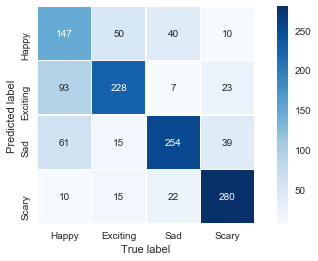

In [11]:
from sklearn.metrics import confusion_matrix

# Give exact names of the classes in lables in the order you want them to appear in the matrix.
mat = confusion_matrix(y_test, y_pred, labels=["Happy-Music","Exciting-Music","Sad-Music","Scary-Music"])

plt.figure(figsize=(8,4)) # increase size of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True , xticklabels=["Happy","Exciting","Sad","Scary"],
            linewidth =0.5 , yticklabels=["Happy","Exciting","Sad","Scary"], cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.savefig('Logit_Confusion.jpg')

The X-axis shows true class labels Y-axis shows predicted labels for the class , the numbers inside the boxes reperesent the no of instances classified for that particular label. For a perfect classifier we should have a diagnol matrix and all other boxes as 0. Color bar represent the accuracy of the classifier, darker the color of box is the classifier is more accurate in classifying that particular class label.

### Precision, Recall and F-Score

#### Percision
The precision is defined as
$$ Precision = \frac{TP}{TP+FP} $$

it measures how "precise" our classifer is. Precision tells us how many of the items our classiger labeled correctly.

The denominator of percision is sum of first row of confusion matrix.

#### Recall
The recall (also called true positive rate, hitrate or sensitivity) is defined as
$$ Recall = \frac{TP}{TP+FN} $$

and measures how many of the "relevant" items we got. The term relevant refers to data points having the label 1.

The denominator of recall is sum of first column of confusion matrix.

#### F1-Score
The F1 score is defined as
$$ F1 = 2 * \frac {Precision * Recall} {Precision+Recall} $$

It is the harmonic mean of precision and recall.

These metrics are available using the "classification_report" included in sklearn library.

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=False )
print(report)

                precision    recall  f1-score   support

Exciting-Music       0.65      0.74      0.69       308
   Happy-Music       0.60      0.47      0.53       311
     Sad-Music       0.69      0.79      0.73       323
   Scary-Music       0.86      0.80      0.82       352

      accuracy                           0.70      1294
     macro avg       0.70      0.70      0.69      1294
  weighted avg       0.70      0.70      0.70      1294



## Support Vector Machine
### Model Fitting

In [13]:
# All the libraries are data are already loaded and data is already splited into train test set

from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)

C:\Users\Atif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Atif\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Predicting output labels and accuracy of model

In [14]:
y_pred = svclassifier.predict(X_test)  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.23802163833075735


#### The accuray of SVM classifier is really bad. 
The problem attributes to the scaling of data, SVM functions well if the data is standarized ([Z-score normalization](https://en.wikipedia.org/wiki/Standard_score)). With stadarized data it scales the data efficiently and the algorithm works faster as well. We will use StandardScaler fron sklearn library for standarizing our data. Spend a lot of time in figuring this problem out.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fitting Model

In [16]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf', gamma =0.001 , C=10)  # Using radial bias function kernel
svclassifier.fit(X_train_scaled, y_train)

C:\Users\Atif\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predicting output labels and accuracy of model

In [17]:
y_pred = svclassifier.predict(X_test_scaled)  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7109737248840804


### Confusion Matrix

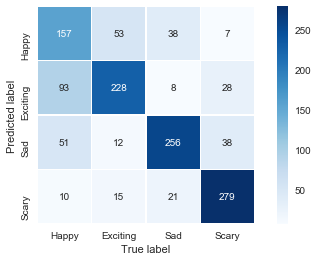

In [18]:
from sklearn.metrics import classification_report, confusion_matrix 

# Give exact names of the classes in lables in the order you want them to appear in the matrix.
mat = confusion_matrix(y_test, y_pred, labels=["Happy-Music","Exciting-Music","Sad-Music","Scary-Music"])

plt.figure(figsize=(8,4)) # increase size of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True , xticklabels=["Happy","Exciting","Sad","Scary"],
            linewidth =0.5 , yticklabels=["Happy","Exciting","Sad","Scary"], cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.savefig('SVM_Confusion.jpg')


### Precision, Recall and F-Score


In [19]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

Exciting-Music       0.64      0.74      0.69       308
   Happy-Music       0.62      0.50      0.55       311
     Sad-Music       0.72      0.79      0.75       323
   Scary-Music       0.86      0.79      0.82       352

      accuracy                           0.71      1294
     macro avg       0.71      0.71      0.70      1294
  weighted avg       0.71      0.71      0.71      1294



## Deep Learning

In deep learning we extract multiple layers of non-linear features and pass them to a classifier that combines all the features to make predictions. We are interested in stacking such very deep hierarchies of non-linear features because we cannot learn complex features from a few layers.

### Artificial Neural Network
An artificial neural network (1) takes some input data, and (2) transforms this input data by calculating a weighted sum over the inputs and (3) applies a non-linear function to this transformation to calculate an intermediate state. The three steps above constitute what is known as a layer, and the transformative function is often referred to as a unit. The intermediate states—often termed features—are used as the input into another layer.

Through repetition of these steps, the artificial neural network learns multiple layers of non-linear features, which it then combines in a final layer to create a prediction.

The neural network learns by generating an error signal that measures the difference between the predictions of the network and the desired values and then using this error signal to change the weights (or parameters) so that predictions get more accurate.

### Activation Function
An activation function takes in weighted data (matrix multiplication between input data and weights) and outputs a non-linear transformation of the data. Activation function could be a sigmoid, tanh or ReLU (rectifier linear unit) function. These non-linear activation functions approximate a target function (especially non-convex). The output from these functions are usually referred as an ’Activation’ and a set of such ’Activations’ in the same map are usually referred as ’Activation Map’ or the ’Feature Map’.

### Layer
A layer is the highest-level building block in deep learning. A layer is a container that usually receives weighted input, transforms it with a set of mostly non-linear functions and then passes these values as output to the next layer. A layer is usually uniform, that is it only contains one type of activation function, pooling, convolution etc. so that it can be easily compared to other parts of the network. The first and last layers in a network are called input and output layers, respectively, and all layers in between are called hidden layers.

### Convolution
Convolution is a mathematical operation which describes a rule of how to mix two functions or pieces of information: (1) The feature map (or input data) and (2) the convolution kernel mix together to form (3) a transformed feature map. Convolution is often interpreted as a filter, where the kernel filters the feature map for information of a certain kind (for example one kernel might filter for edges and discard other information).

![title](Convolution_schematic.gif)

<center>Figure: Calculating convolution by sliding image patches over the entire image.<br> One image patch (yellow) of the original image (green) is multiplied by the kernel<br> (red numbers in the yellow patch), and its sum is written to one feature map<br> pixel (red cell in convolved feature). Image source [4].</center><br>

### Pooling / Subsampling
Pooling is a procedure that takes input over a certain area and reduces that to a single value (subsampling). In convolutional neural networks, this concentration of information has the useful property that outgoing connections usually receive similar information (the information is “funneled” into the right place for the input feature map of the next convolutional layer). This provides basic invariance to rotations and translations. For example, if the face on an image patch is not in the center of the image but slightly translated, it should still work fine because the information is funneled into the right place by the pooling operation so that the convolutional filters can detect the face.

The larger the size of the pooling area, the more information is condensed, which leads to slim networks that fit more easily into GPU memory. However, if the pooling area is too large, too much information is thrown away and predictive performance decreases.


### Convolutional Neural Network (CNN)
A convolutional neural network, or preferably convolutional network or convolutional net, uses convolutional layers that filter inputs for useful information. These convolutional layers have parameters that are learned so that these filters are adjusted automatically to extract the most useful information for the task at hand. For example, in a general object recognition task it might be most useful to filter information about the shape of an object (objects usually have very different shapes) while for a bird recognition task it might be more suitable to extract information about the color of the bird (most birds have a similar shape, but different colors; here color is more useful to distinguish between birds). Convolutional networks adjust automatically to find the best feature for these tasks.

Usually, multiple convolutional layers are used that filter images for more and more abstract information after each layer.

Convolutional networks usually also use pooling layers for limited translation and rotation invariance (detect the object even if it appears at some unusual place). Pooling also reduces the memory consumption and thus allows for the usage of more convolutional layers.
<br>
<br>
<br>
<br>

![title](LeNet-5.png)
<br>
<center>Figure: CNN for digit recognition . Image source [5]</center>
<br>
For detailed explanation you can refer to following papers:
- [ImageNet Classification with Deep Convolutional Neural Networks (AlexNet)](https://www.researchgate.net/publication/267960550_ImageNet_Classification_with_Deep_Convolutional_Neural_Networks)
- [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

### Import relevant libraries

In [1]:
%matplotlib inline

import os, glob
import datetime
import librosa
import numpy as np
import librosa.display
from tqdm import tqdm
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, Callback

C:\Users\Atif\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Read audio as raw data and return with it's label

In [ ]:
def audio_to_spectogram(filename):
    y,sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    #Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)
    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
#     spectogram = librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
#     print log_S
    return log_S
    
from skimage.transform import resize
    
def read_data(file_path, label=0):
    loadedSpectros = []
    target_label = []
    count = 0
    for audio in tqdm(glob.glob(os.path.join(file_path, '*.wav'))):
        if count < 12000: 
            spect_img = audio_to_spectogram(audio) # alternative: comment line and add read img
            #spect_img=mpimg.imread(audio)
            img_array = np.array(spect_img).astype('float32') / 255. #normalize 0 to 1
            img_array= resize(img_array, (128, 256),  mode="reflect")
            img_array = np.expand_dims(img_array, -1)
            loadedSpectros.append(img_array)
            target_label.append(label)
            count+=1
    return np.array(loadedSpectros), np.array(target_label)

### Load and assign labels to audio files

In [ ]:
DATA_PATH = "C:/Users/Atif/Youtube-dl/MyProject" # Give path to the folder where your audio segments are stored

X = []
Y = []
load_path = os.listdir(DATA_PATH)

for i, class_path in enumerate(load_path):
    absolute_path = os.path.join(DATA_PATH, class_path)
    print ("Folder: {}, label {}".format(class_path, i))
    generate_data, label = read_data(absolute_path, label=i)
    X.extend(generate_data)
    Y.extend(label)
    
X = np.array((X))
Y = np.array((Y))
print ("Check input data and label have same shape")

# Very important to save the X and Y as sometime when kernel died during training, then we don't have to load all  the audiofiles 
# again and create spectogram
np.save('X_data', X)
np.save('Y_data', Y)

print ("Input data: ", X.shape)
print ("Target data: ", Y.shape)

In [2]:
# Use it to load data again if the kernel dies during training.
X = np.load('C:/Users/Atif/X_data.npy')# give path to zour saved data
Y = np.load('C:/Users/Atif/Y_data.npy')

### Split dataset into training and test/validation sets

In [3]:
"""Assuming validation and test are same"""
test_split_size = 0.1

X, Y = shuffle(X, Y, random_state=1333) # shuffle data before split)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_split_size,
                                                    random_state=42)

print ('x_train shape: ', x_train.shape)
print ('x_test shape: ', x_test.shape)
print ('y_train shape: ', y_train.shape)
print ('y_test shape: ', y_test.shape)

x_train shape:  (3880, 128, 256, 1)
x_test shape:  (432, 128, 256, 1)
y_train shape:  (3880,)
y_test shape:  (432,)


### Visualizing training samples

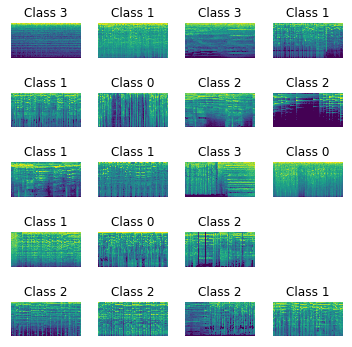

In [5]:
""" Visualize training samples"""
start_idx = 0
# Display 20 training dataset 
plt.rcParams['figure.figsize'] = (5,5)
for i in range(0,20):
    ax1= plt.subplot(5,4,i+1)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.title("Class {}".format(int(y_train[i + start_idx])))
    plt.imshow(x_train[i + start_idx, :,:, 0])
    plt.tight_layout()
    plt.axis('off')
plt.show()

### Convert labels into one-hotencoding

In [6]:
nb_classes=4
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test_unit = np_utils.to_categorical(y_test, nb_classes)

### Create and compile neural network architecture 


In [7]:
current_time = datetime.datetime.now
print ('Loadin(g model at: ' + str(current_time()))
print ('----------------------------------------')


######################################################################
#                   Input Image Shape
######################################################################
input_img = Input(shape=x_train.shape[1:],name='input_img')
######################################################################
#                   DownSampling
######################################################################
conv_1 = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv_1')(input_img)
maxpool_1 = MaxPooling2D(pool_size=(2, 2), name='maxpool_1')(conv_1)

conv_2 = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv_2')(maxpool_1)
maxpool_2 = MaxPooling2D(pool_size=(2, 2), name='maxpool_2')(conv_2)

conv_3 = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv_3')(maxpool_2)
maxpool_3 = MaxPooling2D(pool_size=(2, 2), name='maxpool_3')(conv_3)

conv_4 = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv_4')(maxpool_3)
maxpool_4 = MaxPooling2D(pool_size=(2, 2), name='maxpool_4')(conv_4)

######################################################################
#                   flatten and classfication
######################################################################
x = Flatten(name='flat_2')(maxpool_4)
x = Dropout(0.25, name='fc_dropout1')(x)
x = Dense(256, activation = 'relu', name='fc_1')(x)
x = Dropout(0.5, name='fc_dropout2')(x)
classificiation_out = Dense(nb_classes, activation='softmax', name='class_out')(x) 

with tf.device('/cpu:0'):
    model = Model(inputs=[input_img], outputs=[classificiation_out])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loadin(g model at: 2019-07-18 06:37:25.375773
----------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_img (InputLayer)       (None, 128, 256, 1)       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 128, 256, 32)      320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 64, 128, 32)       0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 64, 128, 64)       18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 32, 64, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 32, 64, 128)       73856     
_______________________________________________________

### Checkpoints for saving the best weights and model

In [8]:
checkpoint = ModelCheckpoint("Best_model.h5", monitor='val_acc', verbose=0, 
                              save_best_only=True, save_weights_only=False, mode='auto')

### Training the Model

In [9]:
""" Model training"""
start_timer = current_time()
history = model.fit(x_train, y_train, epochs=20, batch_size=8, verbose=1, shuffle=True,
                    validation_data=(x_test,y_test_unit), callbacks=[checkpoint]) 
print ('Training time: ', (current_time() - start_timer))

Train on 3880 samples, validate on 432 samples
Epoch 1/20
1648/3880 [===========>..................] - ETA: 1:19:26 - loss: 1.3806 - acc: 0.37 - ETA: 40:04 - loss: 1.4359 - acc: 0.3750 - ETA: 26:54 - loss: 1.4282 - acc: 0.33 - ETA: 20:20 - loss: 1.3846 - acc: 0.40 - ETA: 16:25 - loss: 1.4143 - acc: 0.35 - ETA: 13:47 - loss: 1.4233 - acc: 0.29 - ETA: 11:55 - loss: 1.4156 - acc: 0.26 - ETA: 10:31 - loss: 1.4146 - acc: 0.25 - ETA: 9:25 - loss: 1.4073 - acc: 0.2361 - ETA: 8:32 - loss: 1.4044 - acc: 0.250 - ETA: 7:49 - loss: 1.4004 - acc: 0.261 - ETA: 7:13 - loss: 1.4012 - acc: 0.270 - ETA: 6:43 - loss: 1.3970 - acc: 0.278 - ETA: 6:17 - loss: 1.3952 - acc: 0.267 - ETA: 5:54 - loss: 1.4000 - acc: 0.266 - ETA: 5:34 - loss: 1.3961 - acc: 0.289 - ETA: 5:17 - loss: 1.3945 - acc: 0.286 - ETA: 5:01 - loss: 1.3930 - acc: 0.284 - ETA: 4:47 - loss: 1.3907 - acc: 0.289 - ETA: 4:35 - loss: 1.3926 - acc: 0.275 - ETA: 4:23 - loss: 1.3893 - acc: 0.285 - ETA: 4:13 - loss: 1.3850 - acc: 0.289 - ETA: 4:04 - 

1720/3880 [============>.................] - ETA: 45s - loss: 1.3905 - acc: 0.12 - ETA: 47s - loss: 1.3910 - acc: 0.18 - ETA: 48s - loss: 1.3818 - acc: 0.25 - ETA: 49s - loss: 1.3879 - acc: 0.21 - ETA: 49s - loss: 1.3859 - acc: 0.25 - ETA: 49s - loss: 1.3857 - acc: 0.27 - ETA: 49s - loss: 1.3909 - acc: 0.25 - ETA: 49s - loss: 1.3936 - acc: 0.23 - ETA: 49s - loss: 1.3942 - acc: 0.22 - ETA: 49s - loss: 1.3936 - acc: 0.22 - ETA: 49s - loss: 1.3966 - acc: 0.22 - ETA: 49s - loss: 1.3976 - acc: 0.21 - ETA: 49s - loss: 1.3977 - acc: 0.21 - ETA: 49s - loss: 1.3961 - acc: 0.23 - ETA: 49s - loss: 1.3941 - acc: 0.24 - ETA: 48s - loss: 1.3943 - acc: 0.24 - ETA: 48s - loss: 1.3932 - acc: 0.25 - ETA: 48s - loss: 1.3919 - acc: 0.26 - ETA: 48s - loss: 1.3915 - acc: 0.25 - ETA: 48s - loss: 1.3953 - acc: 0.24 - ETA: 48s - loss: 1.3935 - acc: 0.25 - ETA: 48s - loss: 1.3918 - acc: 0.26 - ETA: 48s - loss: 1.3929 - acc: 0.25 - ETA: 48s - loss: 1.3926 - acc: 0.25 - ETA: 48s - loss: 1.3917 - acc: 0.25 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 1.2885 - acc: 0.348 - ETA: 5s - loss: 1.2885 - acc: 0.349 - ETA: 5s - loss: 1.2885 - acc: 0.349 - ETA: 5s - loss: 1.2879 - acc: 0.348 - ETA: 5s - loss: 1.2880 - acc: 0.348 - ETA: 5s - loss: 1.2878 - acc: 0.348 - ETA: 5s - loss: 1.2869 - acc: 0.349 - ETA: 5s - loss: 1.2875 - acc: 0.348 - ETA: 4s - loss: 1.2878 - acc: 0.348 - ETA: 4s - loss: 1.2870 - acc: 0.348 - ETA: 4s - loss: 1.2864 - acc: 0.349 - ETA: 4s - loss: 1.2870 - acc: 0.349 - ETA: 4s - loss: 1.2862 - acc: 0.349 - ETA: 4s - loss: 1.2860 - acc: 0.349 - ETA: 4s - loss: 1.2860 - acc: 0.350 - ETA: 4s - loss: 1.2861 - acc: 0.350 - ETA: 4s - loss: 1.2856 - acc: 0.351 - ETA: 4s - loss: 1.2862 - acc: 0.350 - ETA: 3s - loss: 1.2860 - acc: 0.350 - ETA: 3s - loss: 1.2862 - acc: 0.350 - ETA: 3s - loss: 1.2870 - acc: 0.350 - ETA: 3s - loss: 1.2868 - acc: 0.350 - ETA: 3s - loss: 1.2869 - acc: 0.350 - ETA: 3s - loss: 1.2862 - acc: 0.350 - ETA: 3s - loss: 1.2856 - acc: 0.351 - ETA: 

1720/3880 [============>.................] - ETA: 47s - loss: 1.3446 - acc: 0.12 - ETA: 50s - loss: 1.4756 - acc: 0.12 - ETA: 50s - loss: 1.3815 - acc: 0.16 - ETA: 50s - loss: 1.2737 - acc: 0.31 - ETA: 50s - loss: 1.2201 - acc: 0.37 - ETA: 51s - loss: 1.1835 - acc: 0.41 - ETA: 50s - loss: 1.1581 - acc: 0.44 - ETA: 50s - loss: 1.1477 - acc: 0.43 - ETA: 50s - loss: 1.1164 - acc: 0.45 - ETA: 50s - loss: 1.0907 - acc: 0.45 - ETA: 50s - loss: 1.1349 - acc: 0.42 - ETA: 50s - loss: 1.1146 - acc: 0.42 - ETA: 50s - loss: 1.1029 - acc: 0.42 - ETA: 50s - loss: 1.1105 - acc: 0.42 - ETA: 50s - loss: 1.1059 - acc: 0.43 - ETA: 50s - loss: 1.1122 - acc: 0.43 - ETA: 50s - loss: 1.1553 - acc: 0.41 - ETA: 49s - loss: 1.1477 - acc: 0.41 - ETA: 50s - loss: 1.1684 - acc: 0.41 - ETA: 50s - loss: 1.1532 - acc: 0.41 - ETA: 50s - loss: 1.1415 - acc: 0.42 - ETA: 49s - loss: 1.1359 - acc: 0.42 - ETA: 49s - loss: 1.1452 - acc: 0.41 - ETA: 49s - loss: 1.1511 - acc: 0.40 - ETA: 49s - loss: 1.1580 - acc: 0.40 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 1.1156 - acc: 0.460 - ETA: 5s - loss: 1.1153 - acc: 0.460 - ETA: 5s - loss: 1.1173 - acc: 0.460 - ETA: 5s - loss: 1.1176 - acc: 0.460 - ETA: 5s - loss: 1.1174 - acc: 0.459 - ETA: 5s - loss: 1.1176 - acc: 0.459 - ETA: 5s - loss: 1.1170 - acc: 0.459 - ETA: 5s - loss: 1.1161 - acc: 0.460 - ETA: 5s - loss: 1.1165 - acc: 0.460 - ETA: 4s - loss: 1.1164 - acc: 0.461 - ETA: 4s - loss: 1.1164 - acc: 0.460 - ETA: 4s - loss: 1.1160 - acc: 0.460 - ETA: 4s - loss: 1.1161 - acc: 0.460 - ETA: 4s - loss: 1.1157 - acc: 0.460 - ETA: 4s - loss: 1.1155 - acc: 0.459 - ETA: 4s - loss: 1.1162 - acc: 0.459 - ETA: 4s - loss: 1.1154 - acc: 0.461 - ETA: 4s - loss: 1.1153 - acc: 0.461 - ETA: 3s - loss: 1.1151 - acc: 0.461 - ETA: 3s - loss: 1.1144 - acc: 0.462 - ETA: 3s - loss: 1.1143 - acc: 0.462 - ETA: 3s - loss: 1.1149 - acc: 0.462 - ETA: 3s - loss: 1.1142 - acc: 0.463 - ETA: 3s - loss: 1.1146 - acc: 0.463 - ETA: 3s - loss: 1.1151 - acc: 0.463 - ETA: 

1720/3880 [============>.................] - ETA: 45s - loss: 0.9473 - acc: 0.75 - ETA: 51s - loss: 0.8966 - acc: 0.75 - ETA: 52s - loss: 0.9362 - acc: 0.66 - ETA: 51s - loss: 0.8617 - acc: 0.71 - ETA: 51s - loss: 0.8199 - acc: 0.75 - ETA: 52s - loss: 0.9317 - acc: 0.68 - ETA: 51s - loss: 0.8899 - acc: 0.71 - ETA: 51s - loss: 0.9250 - acc: 0.68 - ETA: 51s - loss: 0.9101 - acc: 0.69 - ETA: 51s - loss: 0.8851 - acc: 0.71 - ETA: 51s - loss: 0.8710 - acc: 0.72 - ETA: 51s - loss: 0.9225 - acc: 0.69 - ETA: 51s - loss: 0.9279 - acc: 0.68 - ETA: 51s - loss: 0.9268 - acc: 0.67 - ETA: 51s - loss: 0.9057 - acc: 0.68 - ETA: 51s - loss: 0.8991 - acc: 0.68 - ETA: 50s - loss: 0.8975 - acc: 0.67 - ETA: 51s - loss: 0.9104 - acc: 0.66 - ETA: 50s - loss: 0.9055 - acc: 0.66 - ETA: 50s - loss: 0.9197 - acc: 0.66 - ETA: 50s - loss: 0.9085 - acc: 0.66 - ETA: 50s - loss: 0.9033 - acc: 0.66 - ETA: 50s - loss: 0.9141 - acc: 0.66 - ETA: 50s - loss: 0.9067 - acc: 0.65 - ETA: 50s - loss: 0.9017 - acc: 0.66 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.8843 - acc: 0.656 - ETA: 5s - loss: 0.8846 - acc: 0.656 - ETA: 5s - loss: 0.8847 - acc: 0.656 - ETA: 5s - loss: 0.8849 - acc: 0.656 - ETA: 5s - loss: 0.8863 - acc: 0.655 - ETA: 5s - loss: 0.8870 - acc: 0.655 - ETA: 5s - loss: 0.8863 - acc: 0.655 - ETA: 5s - loss: 0.8855 - acc: 0.656 - ETA: 5s - loss: 0.8864 - acc: 0.655 - ETA: 4s - loss: 0.8861 - acc: 0.656 - ETA: 4s - loss: 0.8857 - acc: 0.655 - ETA: 4s - loss: 0.8856 - acc: 0.655 - ETA: 4s - loss: 0.8852 - acc: 0.656 - ETA: 4s - loss: 0.8845 - acc: 0.656 - ETA: 4s - loss: 0.8844 - acc: 0.655 - ETA: 4s - loss: 0.8841 - acc: 0.655 - ETA: 4s - loss: 0.8837 - acc: 0.656 - ETA: 4s - loss: 0.8827 - acc: 0.657 - ETA: 3s - loss: 0.8823 - acc: 0.657 - ETA: 3s - loss: 0.8826 - acc: 0.656 - ETA: 3s - loss: 0.8821 - acc: 0.656 - ETA: 3s - loss: 0.8808 - acc: 0.657 - ETA: 3s - loss: 0.8806 - acc: 0.657 - ETA: 3s - loss: 0.8803 - acc: 0.657 - ETA: 3s - loss: 0.8798 - acc: 0.657 - ETA: 

1720/3880 [============>.................] - ETA: 53s - loss: 1.0014 - acc: 0.50 - ETA: 51s - loss: 0.8265 - acc: 0.68 - ETA: 52s - loss: 0.8279 - acc: 0.66 - ETA: 51s - loss: 0.7827 - acc: 0.65 - ETA: 53s - loss: 0.7775 - acc: 0.65 - ETA: 52s - loss: 0.7592 - acc: 0.68 - ETA: 52s - loss: 0.7775 - acc: 0.66 - ETA: 52s - loss: 0.7349 - acc: 0.67 - ETA: 53s - loss: 0.7230 - acc: 0.69 - ETA: 52s - loss: 0.7615 - acc: 0.68 - ETA: 52s - loss: 0.7489 - acc: 0.68 - ETA: 52s - loss: 0.7437 - acc: 0.69 - ETA: 52s - loss: 0.7869 - acc: 0.68 - ETA: 52s - loss: 0.7674 - acc: 0.67 - ETA: 52s - loss: 0.7661 - acc: 0.68 - ETA: 52s - loss: 0.7712 - acc: 0.67 - ETA: 52s - loss: 0.7894 - acc: 0.66 - ETA: 52s - loss: 0.7907 - acc: 0.66 - ETA: 52s - loss: 0.8104 - acc: 0.67 - ETA: 52s - loss: 0.8510 - acc: 0.65 - ETA: 51s - loss: 0.8374 - acc: 0.66 - ETA: 51s - loss: 0.8514 - acc: 0.65 - ETA: 51s - loss: 0.8424 - acc: 0.66 - ETA: 51s - loss: 0.8363 - acc: 0.66 - ETA: 51s - loss: 0.8443 - acc: 0.66 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.8200 - acc: 0.673 - ETA: 5s - loss: 0.8206 - acc: 0.672 - ETA: 5s - loss: 0.8218 - acc: 0.672 - ETA: 5s - loss: 0.8206 - acc: 0.673 - ETA: 5s - loss: 0.8203 - acc: 0.673 - ETA: 5s - loss: 0.8200 - acc: 0.673 - ETA: 5s - loss: 0.8198 - acc: 0.673 - ETA: 5s - loss: 0.8202 - acc: 0.673 - ETA: 5s - loss: 0.8203 - acc: 0.673 - ETA: 4s - loss: 0.8198 - acc: 0.673 - ETA: 4s - loss: 0.8212 - acc: 0.673 - ETA: 4s - loss: 0.8211 - acc: 0.673 - ETA: 4s - loss: 0.8216 - acc: 0.673 - ETA: 4s - loss: 0.8220 - acc: 0.672 - ETA: 4s - loss: 0.8235 - acc: 0.672 - ETA: 4s - loss: 0.8241 - acc: 0.672 - ETA: 4s - loss: 0.8238 - acc: 0.672 - ETA: 4s - loss: 0.8231 - acc: 0.672 - ETA: 3s - loss: 0.8228 - acc: 0.672 - ETA: 3s - loss: 0.8232 - acc: 0.672 - ETA: 3s - loss: 0.8231 - acc: 0.672 - ETA: 3s - loss: 0.8227 - acc: 0.673 - ETA: 3s - loss: 0.8220 - acc: 0.673 - ETA: 3s - loss: 0.8244 - acc: 0.672 - ETA: 3s - loss: 0.8238 - acc: 0.672 - ETA: 

1720/3880 [============>.................] - ETA: 50s - loss: 1.0817 - acc: 0.37 - ETA: 52s - loss: 0.9129 - acc: 0.62 - ETA: 51s - loss: 0.9644 - acc: 0.62 - ETA: 53s - loss: 0.9746 - acc: 0.62 - ETA: 51s - loss: 0.9553 - acc: 0.60 - ETA: 52s - loss: 0.9718 - acc: 0.60 - ETA: 51s - loss: 0.9454 - acc: 0.62 - ETA: 51s - loss: 0.8985 - acc: 0.64 - ETA: 51s - loss: 0.9182 - acc: 0.63 - ETA: 51s - loss: 0.9712 - acc: 0.63 - ETA: 51s - loss: 0.9463 - acc: 0.64 - ETA: 51s - loss: 0.9444 - acc: 0.65 - ETA: 51s - loss: 0.9512 - acc: 0.64 - ETA: 50s - loss: 0.9625 - acc: 0.63 - ETA: 50s - loss: 0.9530 - acc: 0.64 - ETA: 50s - loss: 0.9667 - acc: 0.63 - ETA: 50s - loss: 0.9489 - acc: 0.62 - ETA: 50s - loss: 0.9455 - acc: 0.63 - ETA: 50s - loss: 0.9644 - acc: 0.61 - ETA: 50s - loss: 0.9536 - acc: 0.60 - ETA: 50s - loss: 0.9391 - acc: 0.61 - ETA: 50s - loss: 0.9180 - acc: 0.62 - ETA: 50s - loss: 0.9006 - acc: 0.63 - ETA: 49s - loss: 0.8952 - acc: 0.64 - ETA: 49s - loss: 0.8943 - acc: 0.64 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.7823 - acc: 0.687 - ETA: 5s - loss: 0.7818 - acc: 0.688 - ETA: 5s - loss: 0.7818 - acc: 0.688 - ETA: 5s - loss: 0.7832 - acc: 0.687 - ETA: 5s - loss: 0.7836 - acc: 0.687 - ETA: 5s - loss: 0.7845 - acc: 0.687 - ETA: 5s - loss: 0.7836 - acc: 0.687 - ETA: 5s - loss: 0.7831 - acc: 0.688 - ETA: 5s - loss: 0.7824 - acc: 0.688 - ETA: 4s - loss: 0.7822 - acc: 0.688 - ETA: 4s - loss: 0.7817 - acc: 0.689 - ETA: 4s - loss: 0.7814 - acc: 0.688 - ETA: 4s - loss: 0.7812 - acc: 0.689 - ETA: 4s - loss: 0.7817 - acc: 0.688 - ETA: 4s - loss: 0.7819 - acc: 0.689 - ETA: 4s - loss: 0.7814 - acc: 0.688 - ETA: 4s - loss: 0.7808 - acc: 0.689 - ETA: 4s - loss: 0.7809 - acc: 0.689 - ETA: 3s - loss: 0.7826 - acc: 0.689 - ETA: 3s - loss: 0.7815 - acc: 0.689 - ETA: 3s - loss: 0.7817 - acc: 0.689 - ETA: 3s - loss: 0.7807 - acc: 0.690 - ETA: 3s - loss: 0.7797 - acc: 0.690 - ETA: 3s - loss: 0.7799 - acc: 0.690 - ETA: 3s - loss: 0.7800 - acc: 0.691 - ETA: 

1720/3880 [============>.................] - ETA: 55s - loss: 0.2994 - acc: 0.87 - ETA: 50s - loss: 0.8030 - acc: 0.56 - ETA: 51s - loss: 0.7082 - acc: 0.66 - ETA: 51s - loss: 0.6565 - acc: 0.65 - ETA: 52s - loss: 0.6581 - acc: 0.70 - ETA: 51s - loss: 0.6758 - acc: 0.70 - ETA: 51s - loss: 0.6654 - acc: 0.73 - ETA: 51s - loss: 0.6664 - acc: 0.70 - ETA: 51s - loss: 0.7133 - acc: 0.70 - ETA: 51s - loss: 0.7442 - acc: 0.70 - ETA: 51s - loss: 0.7526 - acc: 0.70 - ETA: 51s - loss: 0.7262 - acc: 0.71 - ETA: 51s - loss: 0.7082 - acc: 0.72 - ETA: 51s - loss: 0.6939 - acc: 0.73 - ETA: 51s - loss: 0.6824 - acc: 0.74 - ETA: 50s - loss: 0.6685 - acc: 0.75 - ETA: 50s - loss: 0.6512 - acc: 0.75 - ETA: 50s - loss: 0.6439 - acc: 0.76 - ETA: 50s - loss: 0.6629 - acc: 0.75 - ETA: 50s - loss: 0.6600 - acc: 0.75 - ETA: 50s - loss: 0.6630 - acc: 0.75 - ETA: 50s - loss: 0.6566 - acc: 0.75 - ETA: 50s - loss: 0.6542 - acc: 0.75 - ETA: 50s - loss: 0.6778 - acc: 0.73 - ETA: 49s - loss: 0.6687 - acc: 0.74 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.7351 - acc: 0.712 - ETA: 5s - loss: 0.7346 - acc: 0.712 - ETA: 5s - loss: 0.7346 - acc: 0.712 - ETA: 5s - loss: 0.7358 - acc: 0.711 - ETA: 5s - loss: 0.7355 - acc: 0.711 - ETA: 5s - loss: 0.7350 - acc: 0.711 - ETA: 5s - loss: 0.7347 - acc: 0.712 - ETA: 5s - loss: 0.7357 - acc: 0.711 - ETA: 5s - loss: 0.7352 - acc: 0.711 - ETA: 4s - loss: 0.7354 - acc: 0.711 - ETA: 4s - loss: 0.7364 - acc: 0.711 - ETA: 4s - loss: 0.7362 - acc: 0.711 - ETA: 4s - loss: 0.7360 - acc: 0.711 - ETA: 4s - loss: 0.7357 - acc: 0.711 - ETA: 4s - loss: 0.7347 - acc: 0.711 - ETA: 4s - loss: 0.7346 - acc: 0.711 - ETA: 4s - loss: 0.7336 - acc: 0.712 - ETA: 4s - loss: 0.7343 - acc: 0.711 - ETA: 3s - loss: 0.7362 - acc: 0.710 - ETA: 3s - loss: 0.7359 - acc: 0.710 - ETA: 3s - loss: 0.7354 - acc: 0.711 - ETA: 3s - loss: 0.7348 - acc: 0.711 - ETA: 3s - loss: 0.7360 - acc: 0.710 - ETA: 3s - loss: 0.7363 - acc: 0.710 - ETA: 3s - loss: 0.7362 - acc: 0.710 - ETA: 

1720/3880 [============>.................] - ETA: 55s - loss: 0.7007 - acc: 0.62 - ETA: 53s - loss: 0.8527 - acc: 0.62 - ETA: 52s - loss: 0.6629 - acc: 0.75 - ETA: 51s - loss: 0.7107 - acc: 0.75 - ETA: 52s - loss: 0.8001 - acc: 0.70 - ETA: 51s - loss: 0.7728 - acc: 0.70 - ETA: 51s - loss: 0.7646 - acc: 0.67 - ETA: 52s - loss: 0.7457 - acc: 0.68 - ETA: 51s - loss: 0.7622 - acc: 0.66 - ETA: 51s - loss: 0.7997 - acc: 0.66 - ETA: 51s - loss: 0.7858 - acc: 0.65 - ETA: 51s - loss: 0.7491 - acc: 0.67 - ETA: 50s - loss: 0.7796 - acc: 0.65 - ETA: 50s - loss: 0.7815 - acc: 0.63 - ETA: 50s - loss: 0.7601 - acc: 0.65 - ETA: 51s - loss: 0.7327 - acc: 0.67 - ETA: 50s - loss: 0.7239 - acc: 0.67 - ETA: 50s - loss: 0.7340 - acc: 0.66 - ETA: 50s - loss: 0.7180 - acc: 0.67 - ETA: 50s - loss: 0.7098 - acc: 0.68 - ETA: 50s - loss: 0.7077 - acc: 0.69 - ETA: 50s - loss: 0.7180 - acc: 0.69 - ETA: 50s - loss: 0.7299 - acc: 0.69 - ETA: 50s - loss: 0.7287 - acc: 0.69 - ETA: 49s - loss: 0.7208 - acc: 0.69 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.7199 - acc: 0.707 - ETA: 5s - loss: 0.7195 - acc: 0.707 - ETA: 5s - loss: 0.7201 - acc: 0.707 - ETA: 5s - loss: 0.7197 - acc: 0.707 - ETA: 5s - loss: 0.7197 - acc: 0.707 - ETA: 5s - loss: 0.7204 - acc: 0.707 - ETA: 5s - loss: 0.7196 - acc: 0.707 - ETA: 5s - loss: 0.7193 - acc: 0.707 - ETA: 5s - loss: 0.7184 - acc: 0.708 - ETA: 4s - loss: 0.7181 - acc: 0.708 - ETA: 4s - loss: 0.7198 - acc: 0.707 - ETA: 4s - loss: 0.7200 - acc: 0.707 - ETA: 4s - loss: 0.7202 - acc: 0.706 - ETA: 4s - loss: 0.7204 - acc: 0.706 - ETA: 4s - loss: 0.7209 - acc: 0.706 - ETA: 4s - loss: 0.7208 - acc: 0.706 - ETA: 4s - loss: 0.7207 - acc: 0.706 - ETA: 4s - loss: 0.7204 - acc: 0.706 - ETA: 3s - loss: 0.7213 - acc: 0.706 - ETA: 3s - loss: 0.7225 - acc: 0.705 - ETA: 3s - loss: 0.7221 - acc: 0.705 - ETA: 3s - loss: 0.7218 - acc: 0.705 - ETA: 3s - loss: 0.7210 - acc: 0.706 - ETA: 3s - loss: 0.7211 - acc: 0.705 - ETA: 3s - loss: 0.7202 - acc: 0.706 - ETA: 

1720/3880 [============>.................] - ETA: 58s - loss: 0.3114 - acc: 0.87 - ETA: 54s - loss: 0.3643 - acc: 0.81 - ETA: 53s - loss: 0.5285 - acc: 0.79 - ETA: 51s - loss: 0.6291 - acc: 0.78 - ETA: 53s - loss: 0.5747 - acc: 0.80 - ETA: 51s - loss: 0.5561 - acc: 0.81 - ETA: 51s - loss: 0.6212 - acc: 0.78 - ETA: 51s - loss: 0.6153 - acc: 0.78 - ETA: 51s - loss: 0.5768 - acc: 0.80 - ETA: 51s - loss: 0.5732 - acc: 0.80 - ETA: 51s - loss: 0.5607 - acc: 0.80 - ETA: 51s - loss: 0.6182 - acc: 0.79 - ETA: 51s - loss: 0.5962 - acc: 0.79 - ETA: 51s - loss: 0.6046 - acc: 0.79 - ETA: 51s - loss: 0.5863 - acc: 0.80 - ETA: 50s - loss: 0.5922 - acc: 0.80 - ETA: 50s - loss: 0.5945 - acc: 0.80 - ETA: 50s - loss: 0.5982 - acc: 0.79 - ETA: 50s - loss: 0.5896 - acc: 0.80 - ETA: 50s - loss: 0.5870 - acc: 0.80 - ETA: 50s - loss: 0.6018 - acc: 0.79 - ETA: 50s - loss: 0.5995 - acc: 0.78 - ETA: 50s - loss: 0.5909 - acc: 0.79 - ETA: 50s - loss: 0.5937 - acc: 0.79 - ETA: 50s - loss: 0.6007 - acc: 0.78 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.6994 - acc: 0.722 - ETA: 5s - loss: 0.7002 - acc: 0.722 - ETA: 5s - loss: 0.6997 - acc: 0.722 - ETA: 5s - loss: 0.6994 - acc: 0.722 - ETA: 5s - loss: 0.6989 - acc: 0.722 - ETA: 5s - loss: 0.6980 - acc: 0.723 - ETA: 5s - loss: 0.6974 - acc: 0.723 - ETA: 5s - loss: 0.6972 - acc: 0.723 - ETA: 5s - loss: 0.6967 - acc: 0.723 - ETA: 4s - loss: 0.6958 - acc: 0.723 - ETA: 4s - loss: 0.6957 - acc: 0.723 - ETA: 4s - loss: 0.6952 - acc: 0.724 - ETA: 4s - loss: 0.6944 - acc: 0.724 - ETA: 4s - loss: 0.6938 - acc: 0.724 - ETA: 4s - loss: 0.6928 - acc: 0.725 - ETA: 4s - loss: 0.6927 - acc: 0.725 - ETA: 4s - loss: 0.6942 - acc: 0.724 - ETA: 4s - loss: 0.6932 - acc: 0.725 - ETA: 3s - loss: 0.6924 - acc: 0.725 - ETA: 3s - loss: 0.6929 - acc: 0.725 - ETA: 3s - loss: 0.6941 - acc: 0.725 - ETA: 3s - loss: 0.6944 - acc: 0.725 - ETA: 3s - loss: 0.6951 - acc: 0.725 - ETA: 3s - loss: 0.6953 - acc: 0.724 - ETA: 3s - loss: 0.6952 - acc: 0.725 - ETA: 

1720/3880 [============>.................] - ETA: 51s - loss: 0.5406 - acc: 0.75 - ETA: 52s - loss: 0.5370 - acc: 0.75 - ETA: 52s - loss: 0.4948 - acc: 0.79 - ETA: 51s - loss: 0.4879 - acc: 0.81 - ETA: 52s - loss: 0.5083 - acc: 0.82 - ETA: 51s - loss: 0.4729 - acc: 0.83 - ETA: 51s - loss: 0.4949 - acc: 0.82 - ETA: 51s - loss: 0.4899 - acc: 0.82 - ETA: 51s - loss: 0.4592 - acc: 0.84 - ETA: 52s - loss: 0.4435 - acc: 0.83 - ETA: 52s - loss: 0.4489 - acc: 0.84 - ETA: 51s - loss: 0.4843 - acc: 0.81 - ETA: 52s - loss: 0.4834 - acc: 0.80 - ETA: 51s - loss: 0.5041 - acc: 0.79 - ETA: 51s - loss: 0.5091 - acc: 0.80 - ETA: 51s - loss: 0.5164 - acc: 0.79 - ETA: 51s - loss: 0.5298 - acc: 0.80 - ETA: 51s - loss: 0.5211 - acc: 0.80 - ETA: 51s - loss: 0.5235 - acc: 0.80 - ETA: 51s - loss: 0.5329 - acc: 0.80 - ETA: 50s - loss: 0.5386 - acc: 0.79 - ETA: 50s - loss: 0.5456 - acc: 0.78 - ETA: 50s - loss: 0.5534 - acc: 0.78 - ETA: 50s - loss: 0.5629 - acc: 0.78 - ETA: 50s - loss: 0.5622 - acc: 0.78 - ETA: 

3880/3880 [==============================] - ETA: 5s - loss: 0.6310 - acc: 0.749 - ETA: 5s - loss: 0.6302 - acc: 0.749 - ETA: 5s - loss: 0.6304 - acc: 0.749 - ETA: 5s - loss: 0.6297 - acc: 0.750 - ETA: 5s - loss: 0.6297 - acc: 0.750 - ETA: 5s - loss: 0.6299 - acc: 0.749 - ETA: 5s - loss: 0.6295 - acc: 0.750 - ETA: 5s - loss: 0.6289 - acc: 0.750 - ETA: 5s - loss: 0.6286 - acc: 0.750 - ETA: 4s - loss: 0.6290 - acc: 0.750 - ETA: 4s - loss: 0.6289 - acc: 0.750 - ETA: 4s - loss: 0.6281 - acc: 0.750 - ETA: 4s - loss: 0.6282 - acc: 0.751 - ETA: 4s - loss: 0.6280 - acc: 0.751 - ETA: 4s - loss: 0.6288 - acc: 0.751 - ETA: 4s - loss: 0.6286 - acc: 0.751 - ETA: 4s - loss: 0.6292 - acc: 0.750 - ETA: 4s - loss: 0.6285 - acc: 0.751 - ETA: 3s - loss: 0.6281 - acc: 0.751 - ETA: 3s - loss: 0.6285 - acc: 0.750 - ETA: 3s - loss: 0.6288 - acc: 0.750 - ETA: 3s - loss: 0.6284 - acc: 0.750 - ETA: 3s - loss: 0.6284 - acc: 0.750 - ETA: 3s - loss: 0.6281 - acc: 0.750 - ETA: 3s - loss: 0.6306 - acc: 0.750 - ETA: 

1720/3880 [============>.................] - ETA: 1:00 - loss: 0.1943 - acc: 1.000 - ETA: 53s - loss: 0.5699 - acc: 0.750 - ETA: 53s - loss: 0.5589 - acc: 0.70 - ETA: 53s - loss: 0.6114 - acc: 0.68 - ETA: 54s - loss: 0.7408 - acc: 0.67 - ETA: 53s - loss: 0.7547 - acc: 0.68 - ETA: 53s - loss: 0.7048 - acc: 0.71 - ETA: 53s - loss: 0.7028 - acc: 0.73 - ETA: 53s - loss: 0.7066 - acc: 0.72 - ETA: 53s - loss: 0.6656 - acc: 0.73 - ETA: 53s - loss: 0.6590 - acc: 0.73 - ETA: 53s - loss: 0.6097 - acc: 0.76 - ETA: 52s - loss: 0.6207 - acc: 0.74 - ETA: 53s - loss: 0.5973 - acc: 0.75 - ETA: 52s - loss: 0.5962 - acc: 0.74 - ETA: 52s - loss: 0.5823 - acc: 0.75 - ETA: 52s - loss: 0.6090 - acc: 0.73 - ETA: 52s - loss: 0.5900 - acc: 0.75 - ETA: 52s - loss: 0.5821 - acc: 0.75 - ETA: 52s - loss: 0.5700 - acc: 0.76 - ETA: 52s - loss: 0.5625 - acc: 0.76 - ETA: 52s - loss: 0.5540 - acc: 0.77 - ETA: 51s - loss: 0.5505 - acc: 0.76 - ETA: 51s - loss: 0.5536 - acc: 0.76 - ETA: 51s - loss: 0.5473 - acc: 0.77 - ET

3880/3880 [==============================] - ETA: 5s - loss: 0.5926 - acc: 0.766 - ETA: 5s - loss: 0.5930 - acc: 0.765 - ETA: 5s - loss: 0.5939 - acc: 0.765 - ETA: 5s - loss: 0.5938 - acc: 0.765 - ETA: 5s - loss: 0.5930 - acc: 0.765 - ETA: 5s - loss: 0.5928 - acc: 0.766 - ETA: 5s - loss: 0.5924 - acc: 0.766 - ETA: 5s - loss: 0.5924 - acc: 0.766 - ETA: 5s - loss: 0.5919 - acc: 0.766 - ETA: 4s - loss: 0.5917 - acc: 0.766 - ETA: 4s - loss: 0.5909 - acc: 0.766 - ETA: 4s - loss: 0.5903 - acc: 0.766 - ETA: 4s - loss: 0.5911 - acc: 0.766 - ETA: 4s - loss: 0.5908 - acc: 0.766 - ETA: 4s - loss: 0.5921 - acc: 0.766 - ETA: 4s - loss: 0.5935 - acc: 0.766 - ETA: 4s - loss: 0.5938 - acc: 0.766 - ETA: 4s - loss: 0.5931 - acc: 0.767 - ETA: 3s - loss: 0.5929 - acc: 0.767 - ETA: 3s - loss: 0.5937 - acc: 0.766 - ETA: 3s - loss: 0.5945 - acc: 0.766 - ETA: 3s - loss: 0.5942 - acc: 0.766 - ETA: 3s - loss: 0.5948 - acc: 0.766 - ETA: 3s - loss: 0.5946 - acc: 0.766 - ETA: 3s - loss: 0.5943 - acc: 0.766 - ETA: 

### Visualiying model's performance

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


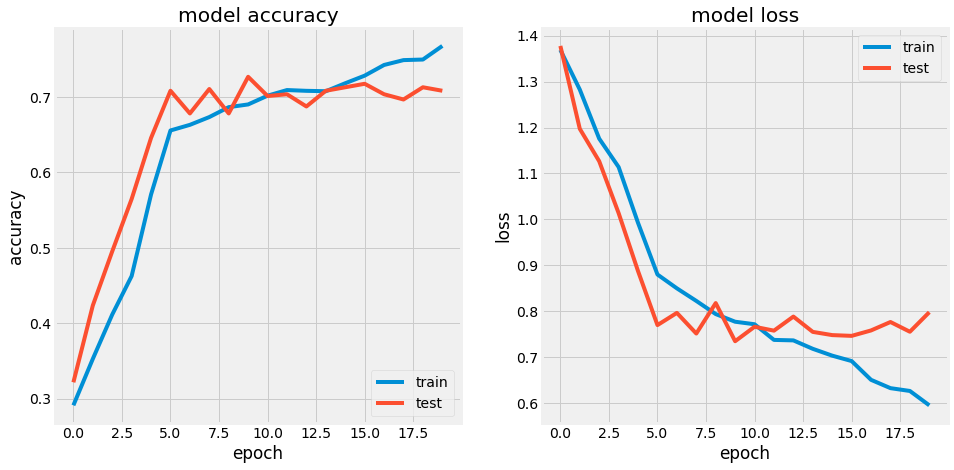

In [10]:
""" Visualize model performance in case of loss and accuracy"""
plt.rcParams["figure.figsize"] = (15,10)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
fig=plt.figure(figsize=(16, 16))
plt.style.use("fivethirtyeight")
for i in range(2):
    ax = fig.add_subplot(2, 2, i+1)
    if i == 0:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='lower right')
    else:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper right')

# save the figure
plt.savefig('output.png')
plt.show()   

### Evaluating Model

In [11]:
""" Evaluate the model with validation set"""
model.load_weights("Best_model.h5") # prestored weights
score = model.evaluate(x_test, y_test_unit, verbose=1)
print ('Test score:', score[0])
print ('Test accuracy:', score[1])

432/432 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 4ms/step
Test score: 0.73466114865409
Test accuracy: 0.7268518518518519


### Predicting output labels and accuracy

In [12]:
"""model prediction on validation or test set (another method for cross verification of performance)"""
predicted_classes = model.predict(x_test)

correct_indices = []
incorrect_indices = []
for i in range(len(x_test)):
    if np.argmax(predicted_classes[i]) == y_test[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

print ("Correct classification predicated : ", len(correct_indices))
print ("Incorrect classification predicated : ", len(incorrect_indices))

c = (float) (len(correct_indices))
i = (float) (len(x_test))

print ("Model Accuracy percentage : ", (c/i) * 100)

Correct classification predicated :  314
Incorrect classification predicated :  118
Model Accuracy percentage :  72.68518518518519


### Confusion Matrix

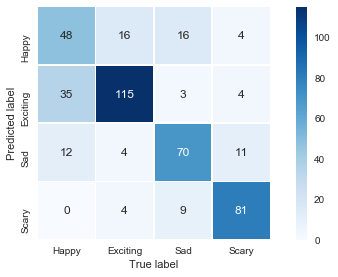

In [14]:
#########################################################
###             Confusion Matrix from Scikit
#########################################################
from sklearn.metrics import classification_report, confusion_matrix
predic_class = []
for i in range(len(predicted_classes)):
    predic_class.append(np.argmax(predicted_classes[i]))
confused_matrix = confusion_matrix(y_true=y_test, y_pred=predic_class, labels=[1,0,2,3])

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

plt.figure(figsize=(8,4)) # increase size of the confusion matrix
sns.heatmap(confused_matrix.T, square=True, annot=True, fmt='d', cbar=True , xticklabels=["Happy","Exciting","Sad","Scary"],
            linewidth =0.5 , yticklabels=["Happy","Exciting","Sad","Scary"], cmap="Blues")
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.savefig('Deep_Confusion.jpg')


### Precision, Recall and F1-score

In [15]:
print(classification_report(y_true=y_test, y_pred=predic_class))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       139
           1       0.57      0.51      0.54        95
           2       0.72      0.71      0.72        98
           3       0.86      0.81      0.84       100

    accuracy                           0.73       432
   macro avg       0.72      0.71      0.72       432
weighted avg       0.72      0.73      0.72       432



## Comparative Analysis

|           |       Logistic Regression      |                    SVM                   |          Deep Learning          |
|:---------:|:------------------------------:|:----------------------------------------:|:-------------------------------:|
|  Accuracy |              0.70              |                   0.71                   |               0.726                  |
| Precision |              0.70              |                   0.71                   |               0.72              |
|   Recall  |              0.70              |                   0.71                   |               0.73              |
|  F1-Score |              0.69              |                   0.71                   |               0.72              |
|           |              Fast              |                   Fast                   |       Training takes time       |
|           | Features Extraction  required  |       Features Extraction  required      | No Features Extraction required |
|           |     No Data standardization    | Data Standardization  required sometimes |     No Data standardization     |

# Conclusion

- Baseline performance of the classifier is 25.32% obtained using ZeroR classifier.
- We have achieved best accuracy of 0.726 through deep learning (Using CNN), SVM and logistic regression models give us accuracy of 0.71 and 0.70 respectively.
- For our dataset the training the model for both logistic regression and SVM algorithms was really fast. Training deep learning model (CNN) took up more than 18 minutes which is huge in magnitude compare to logistic regression and SVM.
- Deep learning does not require any features extraction where as logistic regression and SVM requires features extraction
- SVM requires data standardization to function properly which could take up some processing time, logistic regression and deep learning does not require data standardization.
- Logistic regression and SVM have are relatively easy to use. For deep learning you have to configure the architecture of the model and play with resizing your feature vector, memory of the system could also affect the performance of deep learning algorithm. 

## Related work on same dataset
- Bahuleyan, Hareesh. "Music genre classification using machine learning techniques." arXiv preprint arXiv:1804.01149 (2018).

# References
- [1] Michalski, Ryszard S., Jaime G. Carbonell, and Tom M. Mitchell, eds. Machine
learning: An artificial intelligence approach. Springer Science Business Media, 2013
- [2] Koza J.R., Bennett F.H., Andre D., Keane M.A. (1996) Automated Design
of Both the Topology and Sizing of Analog Electrical Circuits Using Genetic Programming.
In: Gero J.S., Sudweeks F. (eds) Artificial Intelligence in Design '96.
Springer, Dordrecht
- [3] Bishop, Christopher M. "Graphical models." Pattern recognition and machine
learning 4 (2006): 359-422
- [4] [Feature Extraction Using Convolution](http://ufldl.stanford.edu/tutorial/supervised/FeatureExtractionUsingConvolution/)
- [5] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.
- [6][Deep Learning in a Nutshell: Core Concepts](https://devblogs.nvidia.com/deep-learning-nutshell-core-concepts/)
- [7] Introduction to machine learning, WS 2017/18, A. Schulz, B. Hammer